In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import mplhep as hep
from coffea.util import load
from coffea.hist import plot
import coffea.hist as hist
import re

In [30]:
output = load('hists_jet_AK4_jet_AK4.coffea')

pt


/afs/cern.ch/user/m/milee/.local/lib/python3.7/site-packages/coffea/hist/plot.py:357: RuntimeWarning: divide by zero encountered in true_divide
  rsumw = sumw_num / sumw_denom
/afs/cern.ch/user/m/milee/.local/lib/python3.7/site-packages/coffea/hist/plot.py:364: RuntimeWarning: divide by zero encountered in true_divide
  rsumw_err = numpy.abs(poisson_interval(rsumw, sumw2_num / sumw_denom**2) - rsumw)
/afs/cern.ch/user/m/milee/.local/lib/python3.7/site-packages/coffea/hist/plot.py:39: RuntimeWarning: invalid value encountered in true_divide
  scale[sumw != 0] = sumw2[sumw != 0] / sumw[sumw != 0]
/afs/cern.ch/user/m/milee/.local/lib/python3.7/site-packages/coffea/hist/plot.py:378: RuntimeWarning: invalid value encountered in true_divide
  denom_unc = poisson_interval(unity, sumw2_denom / sumw_denom**2)


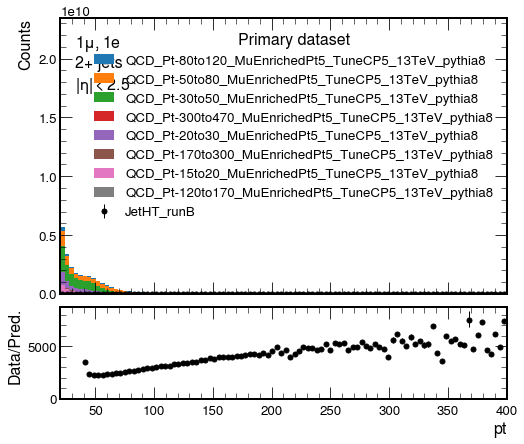

In [31]:
plt.style.use([hep.style.ROOT, {'font.size': 16}])

# plot options for data
data_err_opts = {
    'linestyle': 'none',
    'marker': '.',
    'markersize': 10.,
    'color': 'k',
    'elinewidth': 1,
}

# print(output.keys())

# for i in range(0, len(output.keys())-1):
# h=output['jet_pt']
# fig, ((ax1),(rax1)) = plt.subplots(2, 1, figsize=(8, 7), gridspec_kw={"height_ratios": (3, 1)}, sharex=True)
# fig.subplots_adjust(hspace=.07)
# ixes = h.axis('flav').identifiers()
# hqp = h.integrate('dataset')
# hqp = hqp.rebin("flav",hist.Bin("flav","flav",[0,4,5,6]))
# plot.plot1d(hqp,ax=ax1,overlay="flav",stack=True)


# for i in range(0,  len(output.keys())-1):
for i in range(0,  1):
    fig, ((ax1),(rax1)) = plt.subplots(2, 1, figsize=(8, 7), gridspec_kw={"height_ratios": (3, 1)}, sharex=True)
    fig.subplots_adjust(hspace=.07)
    h1name = list(output.keys())[i]
    if any([h1name.startswith('cutflow')]): 
        break
    if any([h1name.startswith('n')]):
        continue
#     if not any([h1name.startswith('btag')]): 
#         continue
    h1 = output[h1name]
    print(h1name)
    dense = False 
    for ax, rax, h in zip([ax1], [rax1], [h1]):
        scales = {
            'QCD_Pt-15to20_MuEnrichedPt5_TuneCP5_13TeV_pythia8':1.53E+04,
            'QCD_Pt-20to30_MuEnrichedPt5_TuneCP5_13TeV_pythia8':5.08E+02, 
             'QCD_Pt-30to50_MuEnrichedPt5_TuneCP5_13TeV_pythia8': 2.72E+02, 
             'QCD_Pt-50to80_MuEnrichedPt5_TuneCP5_13TeV_pythia8':8.72E+01,
            'QCD_Pt-80to120_MuEnrichedPt5_TuneCP5_13TeV_pythia8':2.06E+01,
            'QCD_Pt-120to170_MuEnrichedPt5_TuneCP5_13TeV_pythia8':5.81E+00,
            'QCD_Pt-170to300_MuEnrichedPt5_TuneCP5_13TeV_pythia8':1.19E+01,
            'QCD_Pt-300to470_MuEnrichedPt5_TuneCP5_13TeV_pythia8':2.20E-01
        }
        h.scale(scales,axis='dataset')          
        notdata = re.compile('(?!JetHT_runB)')

        if hasattr(h, 'dim'):
            h=h.rebin("flav",hist.Bin("flav", "flav", [0,4,5,6]))
            ax = plot.plot1d(h[notdata].sum("flav"), overlay="dataset", ax=ax,  density=dense, stack=True, clear=False);
            plot.plot1d(h["JetHT_runB"].sum("flav"), overlay="dataset",ax=ax,  density=dense, error_opts=data_err_opts, clear=False);
#             ax.legend(handles=ax.get_legend_handles_labels()[0],labels=['80-120','800-1000','50-80','470-600','30-50','300-470','20-30','170-300','15-20','120-170','1000-inf'])

#             now we build the ratio plot
            plot.plotratio(
                   num=h[notdata].sum("dataset").sum("flav"),
                    denom=h["JetHT_runB"].sum("dataset").sum("flav"),
                    ax=rax,
                    error_opts=data_err_opts,
                    denom_fill_opts={},
                    guide_opts={},
                    unc='num'
                )         

        else:
            continue   

    for ax, rax, hname in zip([ax1], [rax1], [h1name]):
#         if not any([h1name.startswith('btag')]): 
#             continue
        at = AnchoredText(r"$1\mu, 1e$"+"\n"+
                           "2+ jets"+"\n"+
                          r"$|\eta| < 2.5$",
                           loc=2, frameon=False)
        ax.add_artist(at)
#         ax.set_ylim(0.001, 5e6)
        if ("btag" in hname) or hname.startswith("DeepCSV_trackDecayLenVal"):
            ax.semilogy()
        rax.set_ylabel('Data/Pred.')
        rax.set_xlabel(hname)
#         rax.set_ylim(0,2.)
        ax.set_xlabel(None)
    hep.mpl_magic(ax1)
